<a href="https://colab.research.google.com/github/Ramlah7/ML/blob/main/ml01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsys','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsys,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
df['class'].unique()


array(['g', 'h'], dtype=object)

In [4]:
df['class']=(df['class']=='g').astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsys,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


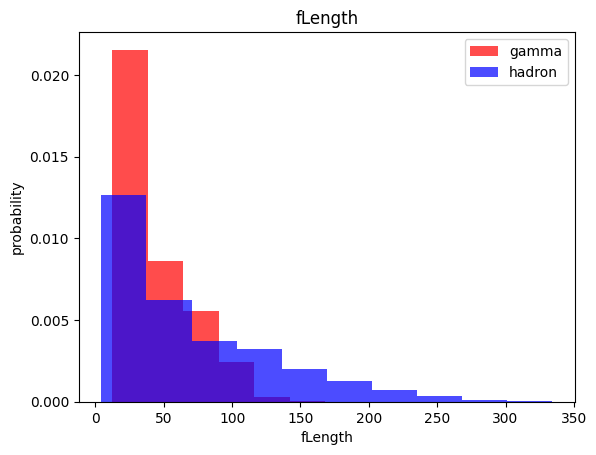

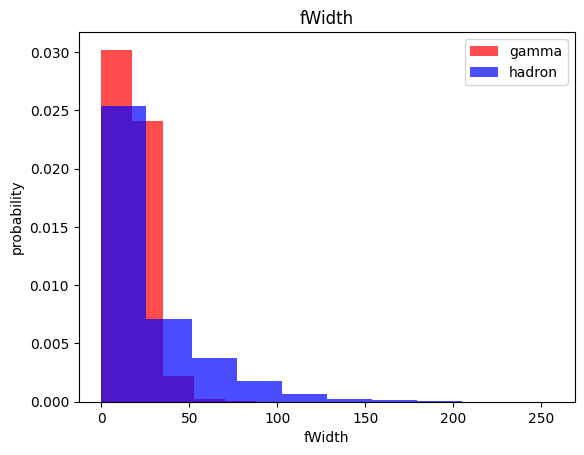

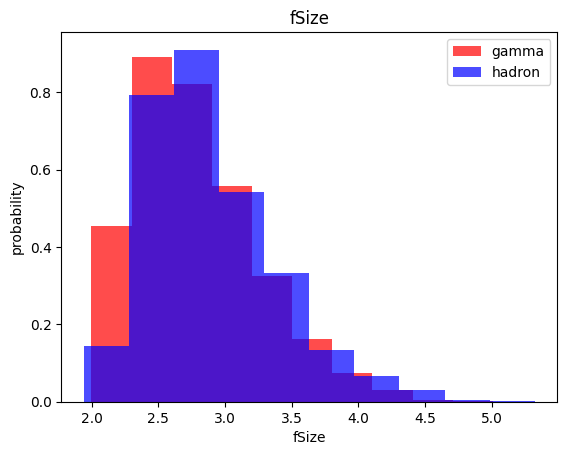

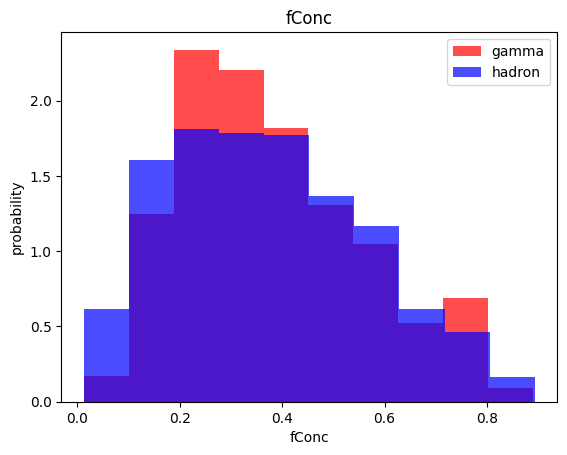

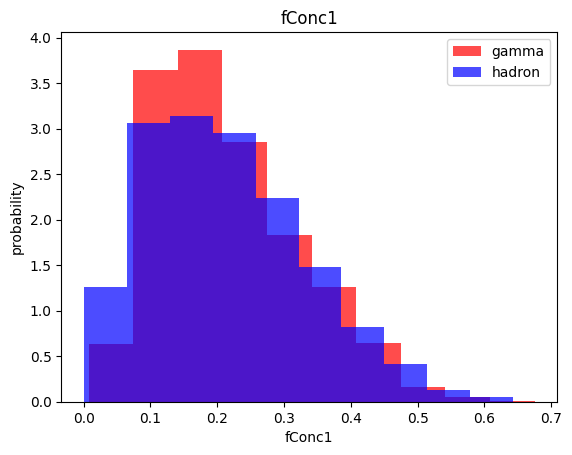

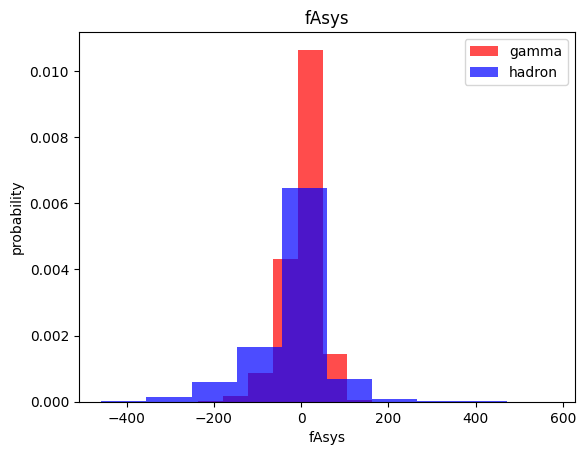

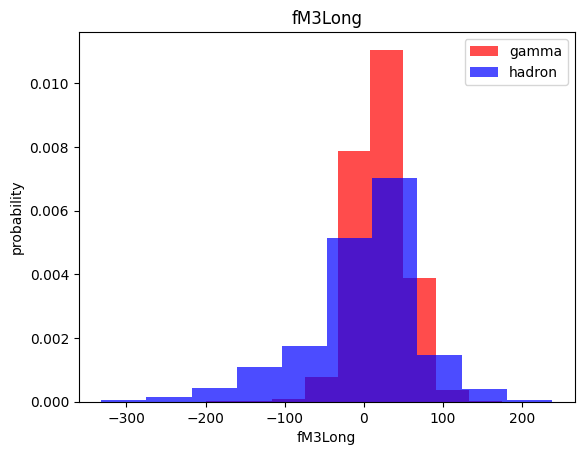

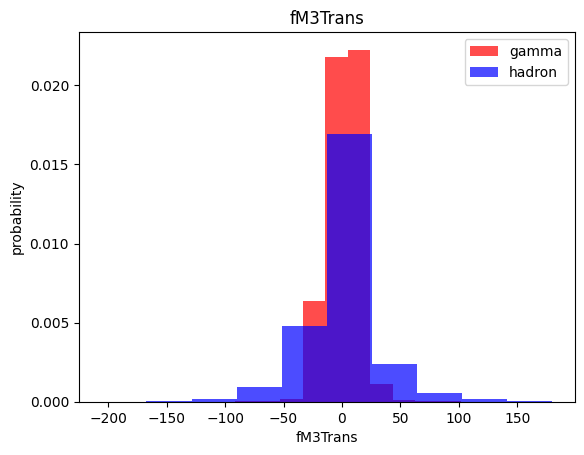

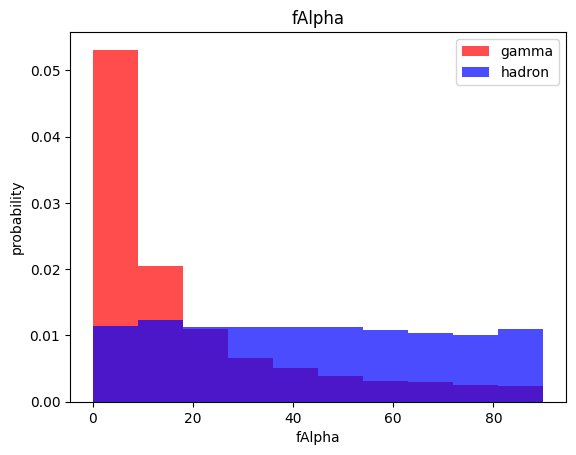

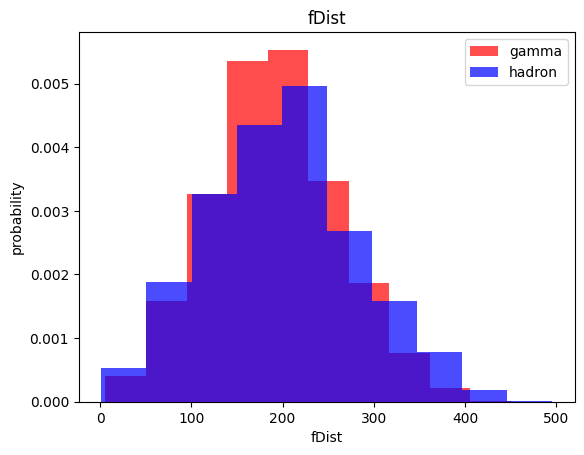

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='red',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label],color='blue',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('probability')
  plt.legend()
  plt.show()

In [6]:
train,valid,test=np.split(df.sample(frac=1),(int(0.6* len(df)),int(0.8*len(df))))

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsys,fM3Long,fM3Trans,fAlpha,fDist,class
7846,78.1465,21.7463,3.0794,0.3065,0.1670,46.2450,47.6317,-18.9710,6.1810,383.6740,1
220,29.8023,10.9847,2.2999,0.4862,0.2882,27.7037,24.3173,8.5655,0.3520,209.7840,1
17220,83.9196,13.3743,3.1342,0.2105,0.1175,17.3033,15.0513,-9.1687,82.8678,158.6521,0
7178,51.2908,11.6119,2.8338,0.2947,0.1503,35.9932,50.5144,4.8974,8.6440,224.3450,1
5649,17.5896,15.3005,2.5072,0.5381,0.3188,-8.3275,16.1091,-10.0853,21.5205,159.4210,1
...,...,...,...,...,...,...,...,...,...,...,...
13421,48.0794,21.6991,2.8169,0.1951,0.0983,39.9444,-26.7368,-10.4961,88.1059,75.6317,0
11954,16.9022,11.1366,2.2304,0.5882,0.3676,-0.5437,4.1166,-7.1473,52.4270,168.2030,1
11550,27.3301,18.1564,2.3711,0.4128,0.2362,3.3111,20.9680,13.5505,23.2359,105.7750,1
9460,71.2506,20.2914,3.0695,0.2548,0.1521,-36.8564,51.7627,-11.8395,0.7380,303.6290,1


In [9]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y


In [12]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

In [16]:
print(sum(y_train==1))
print(sum(y_train==0))

7392
7392


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred=knn_model.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1348
           1       0.85      0.85      0.85      2456

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



naive **byes**

In [26]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [29]:
y_predict=nb_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1348
           1       0.73      0.88      0.80      2456

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804

